**Compare Multiple Models**

1.Import Libraries

In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

2.Dataset

In [47]:
data = {
    "Study_Hours": [1,2,3,4,5,6,7,8,9,10],
    "Attendance": [50,55,60,65,70,75,80,85,90,95],
    "Previous_Score": [35,40,45,50,55,60,65,70,75,80],
    "Pass": [0,0,0,0,0,1,1,1,1,1]
}

df = pd.DataFrame(data)

x = df.drop("Pass", axis=1)
y = df["Pass"]


3.Train Test Split

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


4.Scalling (for KNN,SVM)

In [49]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

5.Train All Modles

In [50]:
models = {"Logistic" : LogisticRegression(max_iter=1000),
          "KNN" : KNeighborsClassifier(n_neighbors=3),
          "Decision_Tree" : DecisionTreeClassifier(max_depth=3,random_state=42),
          "Random_Forest" : RandomForestClassifier(random_state=42),
          "SVM" : SVC()}

6.Comparing Models

Confusion Matrix:
 [[1 0]
 [0 1]]


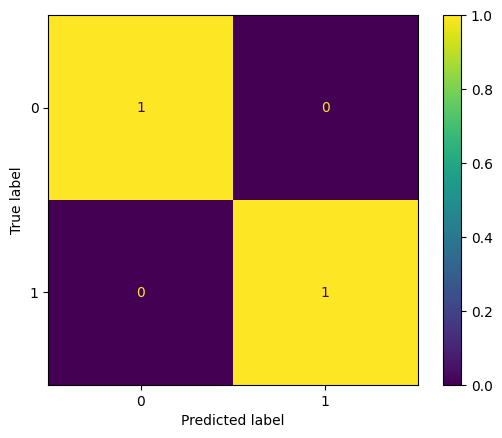

Confusion Matrix:
 [[1 0]
 [0 1]]


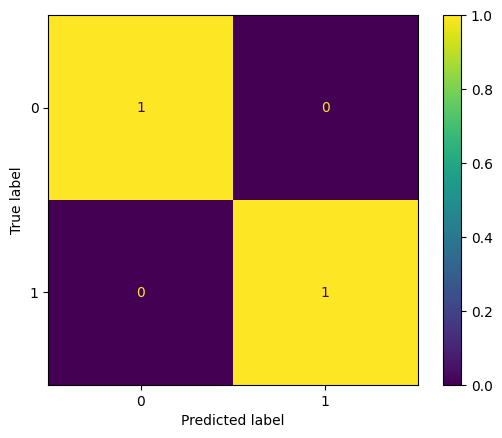

Confusion Matrix:
 [[1 0]
 [0 1]]


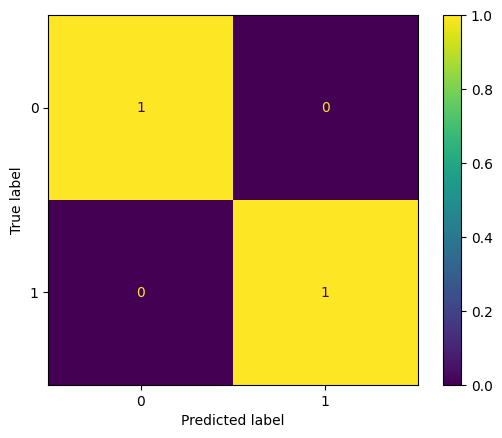

Confusion Matrix:
 [[1 0]
 [0 1]]


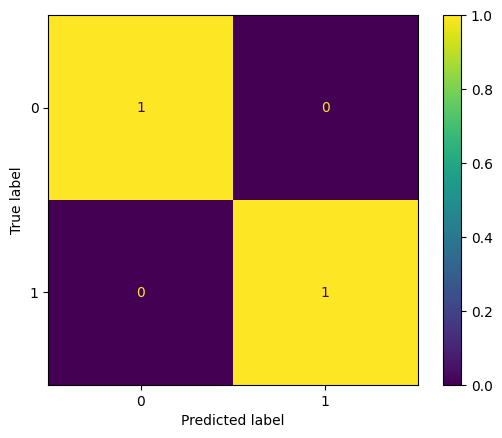

Confusion Matrix:
 [[1 0]
 [0 1]]


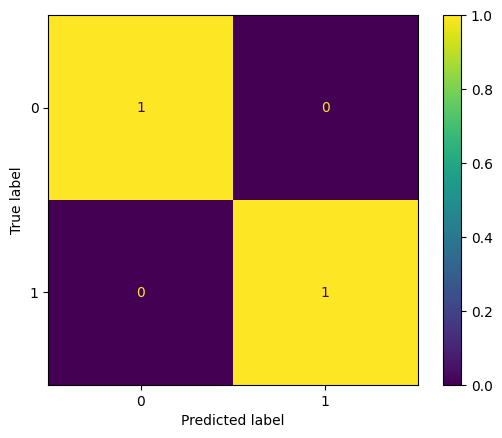

In [58]:
results = {}

for name, model in models.items():

    if name in ["KNN", "SVM", "Logistic"]:
        pipe = Pipeline([
            ("scaler", StandardScaler()),
            ("model", model)
        ])

        cv_score = cross_val_score(pipe, x, y, cv=5, scoring="accuracy")

        pipe.fit(x_train, y_train)
        preds = pipe.predict(x_test)

    else:
        cv_score = cross_val_score(model, x, y, cv=5, scoring="accuracy")

        model.fit(x_train, y_train)
        preds = model.predict(x_test)

    accuracy = accuracy_score(y_test, preds)
    cm = confusion_matrix(y_test, preds)

    results[name] = {
        "accuracy": accuracy,
        "cv_mean": cv_score.mean(),
        "confusion_matrix": cm
    }

    print("Confusion Matrix:\n", cm)
    ConfusionMatrixDisplay(cm).plot()
    plt.show()


In [60]:
# View  stored results
for name, metrics in results.items():
    print(f"\n{name}")
    print("Accuracy:",metrics["accuracy"])
    print("CV Mean:",metrics["cv_mean"])
    print("Confusion Matrixs:\n",metrics["confusion_matrix"])


Logistic
Accuracy: 1.0
CV Mean: 0.9
Confusion Matrixs:
 [[1 0]
 [0 1]]

KNN
Accuracy: 1.0
CV Mean: 0.9
Confusion Matrixs:
 [[1 0]
 [0 1]]

Decision_Tree
Accuracy: 1.0
CV Mean: 0.9
Confusion Matrixs:
 [[1 0]
 [0 1]]

Random_Forest
Accuracy: 1.0
CV Mean: 0.9
Confusion Matrixs:
 [[1 0]
 [0 1]]

SVM
Accuracy: 1.0
CV Mean: 0.9
Confusion Matrixs:
 [[1 0]
 [0 1]]


7.Visual Comparison of Accuracy & CV

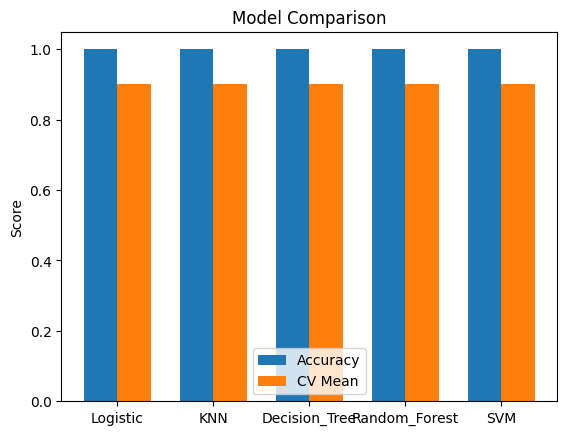

In [59]:
labels = list(results.keys())
acc_vals = [results[m]["accuracy"] for m in labels]
cv_vals = [results[m]["cv_mean"] for m in labels]
x = np.arange(len(labels))
width = 0.35

plt.bar(x - width/2, acc_vals, width, label="Accuracy")
plt.bar(x + width/2, cv_vals, width, label="CV Mean")

plt.xticks(x, labels)
plt.ylim(0,1.05)
plt.ylabel("Score")
plt.title("Model Comparison")
plt.legend()
plt.show()

Visual Comparison of Confusion Matrix

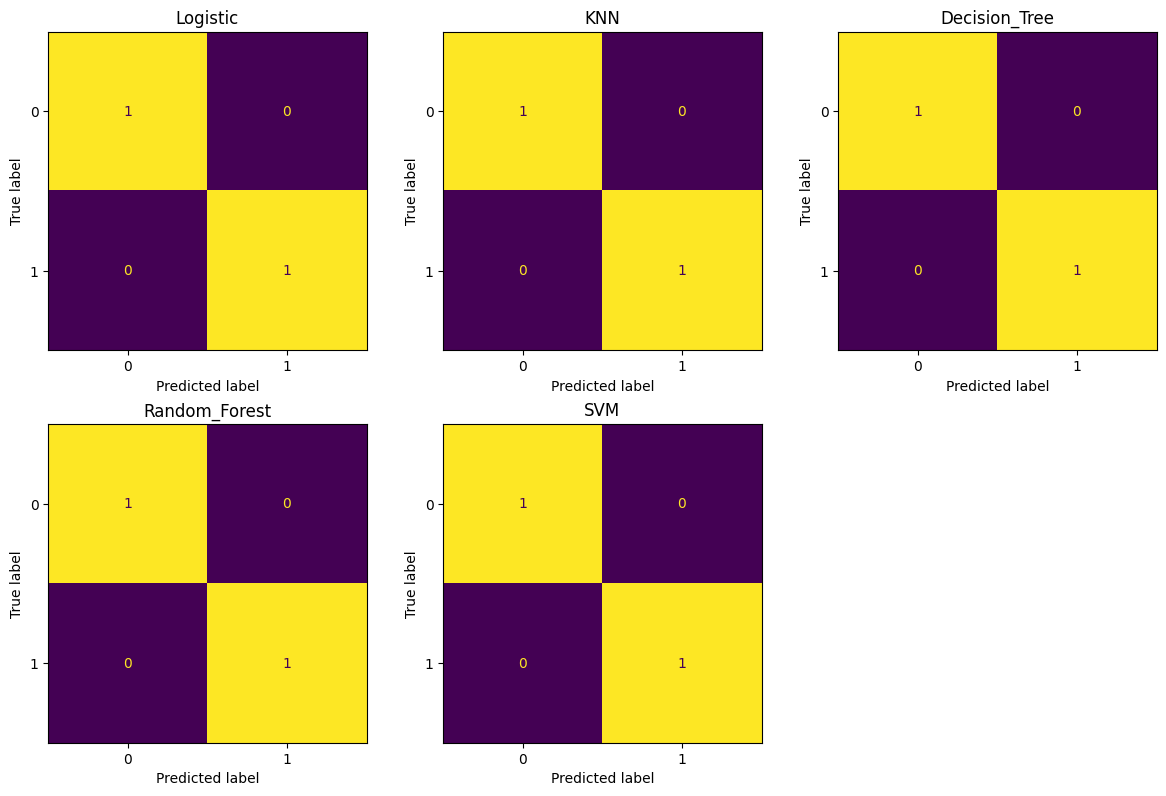

In [61]:
n = len(labels)
cols = 3
rows = (n + cols - 1) // cols

plt.figure(figsize=(12, 4 * rows))

for i, name in enumerate(labels):
    plt.subplot(rows, cols, i + 1)
    ConfusionMatrixDisplay(results[name]["confusion_matrix"]).plot(ax=plt.gca(), colorbar=False)
    plt.title(name)

plt.tight_layout()
plt.show()
